In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-risk-for-loan-approval/Loan.csv
/kaggle/input/financial-risk-for-loan-approval/CSV Generation.py


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[10,4]

In [3]:
df=pd.read_csv('/kaggle/input/financial-risk-for-loan-approval/Loan.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [4]:
df.shape

(20000, 36)

In [5]:
df.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [7]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [8]:
df['ApplicationDate']=pd.to_datetime(df['ApplicationDate'])

In [9]:
df.select_dtypes(include='object')

,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,Employed,Master,Married,Own,Home
1,Employed,Associate,Single,Mortgage,Debt Consolidation
2,Employed,Bachelor,Married,Rent,Education
3,Employed,High School,Single,Mortgage,Home
4,Employed,Associate,Married,Mortgage,Debt Consolidation
...,...,...,...,...,...
19995,Employed,High School,Married,Rent,Auto
19996,Employed,Associate,Married,Rent,Debt Consolidation
19997,Employed,Bachelor,Married,Mortgage,Home
19998,Employed,High School,Married,Own,Debt Consolidation


In [10]:
df.select_dtypes(exclude='object')

,ApplicationDate,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,22,13152,48,2,183,0.354418,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,15,26045,48,1,496,0.087827,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,26,17627,36,2,902,0.137414,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,34,37898,96,1,755,0.267587,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,17,9184,36,1,274,0.320535,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,19,24521,36,3,673,0.101288,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,33,25818,36,5,414,0.471818,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,20,37033,72,3,512,0.216596,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,36,14760,72,3,986,0.364758,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [11]:
x=df.drop(['ApplicationDate','LoanApproved','RiskScore'],axis=1)
x.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210


In [12]:
x.select_dtypes(include='object').columns

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [13]:
x['EmploymentStatus'].value_counts()

EmploymentStatus
Employed         17036
Self-Employed     1573
Unemployed        1391
Name: count, dtype: int64

In [14]:
x['EducationLevel'].value_counts()

EducationLevel
Bachelor       6054
High School    5908
Associate      4034
Master         3050
Doctorate       954
Name: count, dtype: int64

In [15]:
x['MaritalStatus'].value_counts()

MaritalStatus
Married     10041
Single       6078
Divorced     2882
Widowed       999
Name: count, dtype: int64

In [16]:
x['HomeOwnershipStatus'].value_counts()

HomeOwnershipStatus
Mortgage    7939
Rent        6087
Own         3938
Other       2036
Name: count, dtype: int64

In [17]:
x['LoanPurpose'].value_counts()

LoanPurpose
Home                  5925
Debt Consolidation    5027
Auto                  4034
Education             3008
Other                 2006
Name: count, dtype: int64

In [18]:
for i in ['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose']:
    x[i]=x[i].map(x[i].value_counts(normalize=True))

<Axes: >

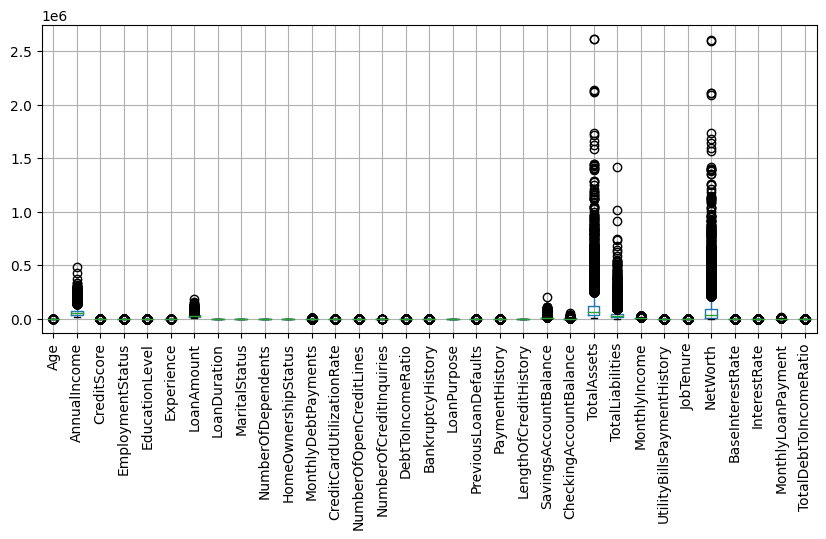

In [19]:
x.boxplot(rot=90)


In [20]:
cols=['AnnualIncome','LoanAmount','SavingsAccountBalance','CheckingAccountBalance','TotalAssets','MonthlyIncome','TotalLiabilities','NetWorth']

In [21]:
# cols=x.nunique()[x.nunique()>2].index
# cols

In [22]:
for i in cols:
    q1=x[i].quantile(0.25)
    q3=x[i].quantile(0.75)
    iqr=q3-q1
    ll=iqr-(1.5*iqr)
    ul=iqr+(1.5*iqr)
    for j in x[i]:
        if j<ll:
            x[i]=x[i].replace(j,ll)
        if j>ul:
            x[i]=x[i].replace(j,ul)
            

<Axes: >

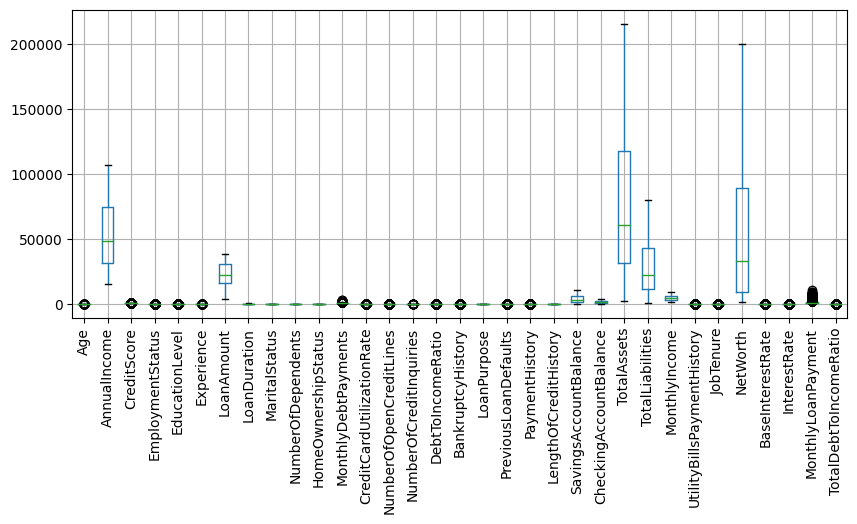

In [23]:
x.boxplot(rot=90)


In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
mmax=MinMaxScaler()

In [26]:
x=pd.DataFrame(mmax.fit_transform(x),columns=x.columns)
x.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,0.435484,0.271824,0.742547,1.0,0.410980,0.360656,0.274916,0.333333,1.000000,0.4,...,0.674646,0.236609,0.274146,0.629222,0.6875,0.632083,0.252979,0.342692,0.029899,0.035632
1,0.322581,0.269220,0.772358,1.0,0.603922,0.245902,0.648886,0.333333,0.561712,0.2,...,0.239412,0.116009,0.271520,0.913134,0.1875,0.213872,0.279870,0.263189,0.064566,0.080708
2,0.467742,0.280279,0.615176,1.0,1.000000,0.426230,0.404716,0.222222,1.000000,0.4,...,0.108112,1.000000,0.282674,0.828172,0.3750,0.021107,0.318360,0.297586,0.052742,0.096319
3,0.645161,0.589279,0.547425,1.0,0.971373,0.557377,0.992691,0.777778,0.561712,0.2,...,0.481223,0.062866,0.594313,0.860478,0.3125,0.494170,0.619424,0.562560,0.088043,0.064136
4,0.306452,0.961691,0.680217,1.0,0.603922,0.278689,0.159821,0.222222,1.000000,0.2,...,1.000000,0.212748,0.969907,0.921559,0.3125,1.000000,0.244002,0.187960,0.021597,0.011695


<Axes: >

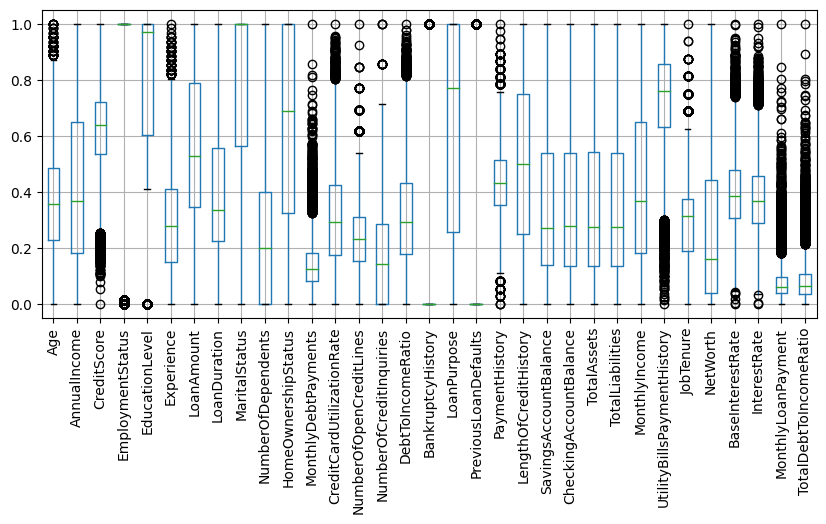

In [27]:
x.boxplot(rot=90)

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2,random_state=42)

In [30]:
x_pca = pd.DataFrame(pca.fit_transform(x),columns=['PC'+str(i) for i in range(1,3)])
x_pca

,PC1,PC2
0,-0.072858,0.489132
1,-0.208274,-0.061876
2,-0.278774,-0.445395
3,0.248584,0.240529
4,0.901242,0.852789
...,...,...
19995,-0.374510,0.047804
19996,-0.009311,0.031547
19997,-0.064852,0.306220
19998,-0.216017,-0.300377


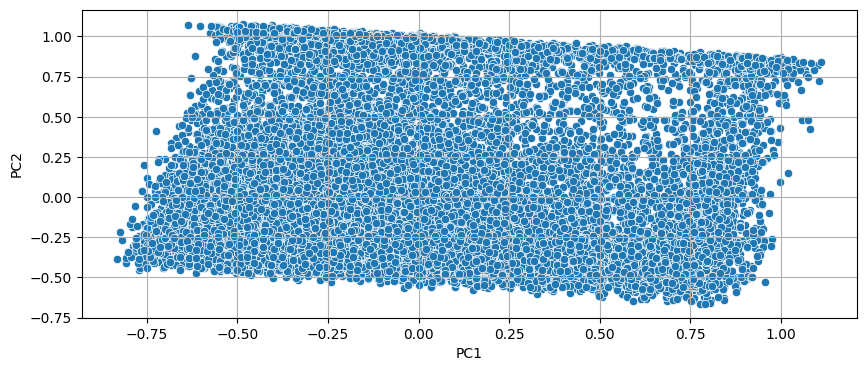

In [31]:
sns.scatterplot(x='PC1',y='PC2',data=x_pca)
plt.grid()
plt.show()

In [32]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram

In [33]:
matrix = linkage(x,method='ward')

In [34]:
from sklearn.cluster import KMeans

In [35]:
clust=9
wcss=[]
for k in range(2,clust):
    kmeans=KMeans(n_clusters=k,random_state=42)
    model=kmeans.fit(x_pca)
    wcss.append(model.inertia_)

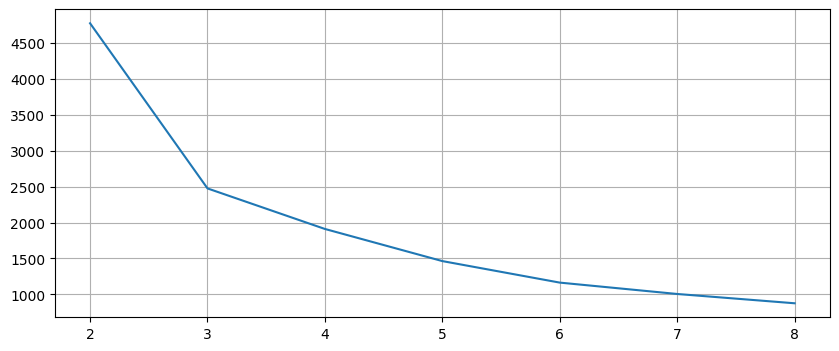

In [36]:
plt.plot(range(2,clust),wcss)
plt.grid()
plt.show()

In [37]:
kmeans=KMeans(n_clusters=3,random_state=42)
model=kmeans.fit(x_pca)
model.labels_

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

In [38]:
x_pca['clusters']=pd.Series(model.labels_)

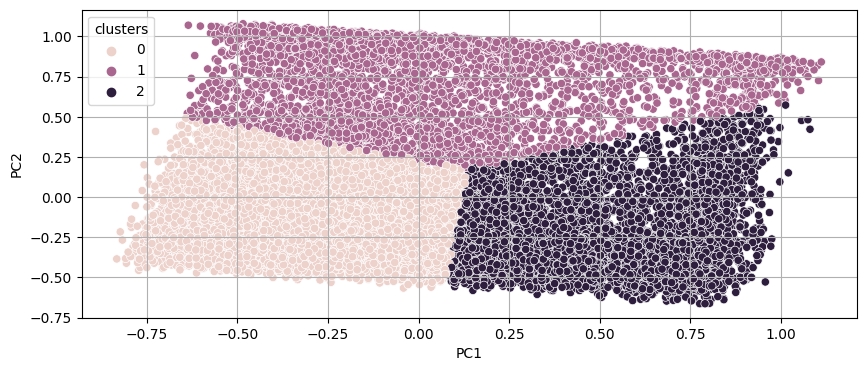

In [39]:
sns.scatterplot(x='PC1',y='PC2',data=x_pca,hue='clusters')
plt.grid()
plt.show()

In [40]:
len(x.columns)

33

In [41]:
x['clusters']=pd.Series(model.labels_)

In [42]:
x.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,clusters
0,0.435484,0.271824,0.742547,1.0,0.410980,0.360656,0.274916,0.333333,1.000000,0.4,...,0.236609,0.274146,0.629222,0.6875,0.632083,0.252979,0.342692,0.029899,0.035632,1
1,0.322581,0.269220,0.772358,1.0,0.603922,0.245902,0.648886,0.333333,0.561712,0.2,...,0.116009,0.271520,0.913134,0.1875,0.213872,0.279870,0.263189,0.064566,0.080708,0
2,0.467742,0.280279,0.615176,1.0,1.000000,0.426230,0.404716,0.222222,1.000000,0.4,...,1.000000,0.282674,0.828172,0.3750,0.021107,0.318360,0.297586,0.052742,0.096319,0
3,0.645161,0.589279,0.547425,1.0,0.971373,0.557377,0.992691,0.777778,0.561712,0.2,...,0.062866,0.594313,0.860478,0.3125,0.494170,0.619424,0.562560,0.088043,0.064136,1
4,0.306452,0.961691,0.680217,1.0,0.603922,0.278689,0.159821,0.222222,1.000000,0.2,...,0.212748,0.969907,0.921559,0.3125,1.000000,0.244002,0.187960,0.021597,0.011695,1


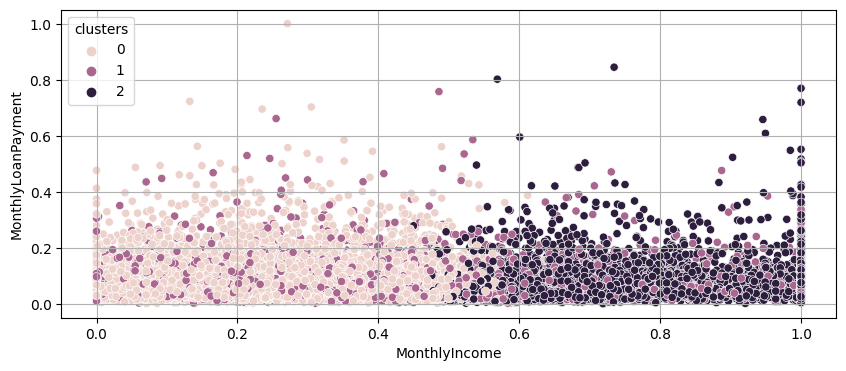

In [43]:
sns.scatterplot(x='MonthlyIncome',y='MonthlyLoanPayment',data=x,hue='clusters')
plt.grid()
plt.show()

In [44]:
#df[['ApplicationDate','LoanApproved','RiskScore']]
df['clusters']=pd.Series(model.labels_)
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,clusters
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,1
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,1
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,1


In [45]:
df[df['clusters']==0].describe()

,ApplicationDate,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,clusters
count,10257,10257.000000,10257.000000,10257.000000,10257.000000,10257.000000,10257.000000,10257.000000,10257.000000,10257.000000,...,10257.000000,10257.000000,10257.000000,10257.000000,10257.000000,10257.000000,10257.000000,10257.000000,10257.000000,10257.0
mean,2045-05-28 05:31:11.073413120,38.191479,36965.791752,566.587696,16.004680,25089.528322,53.899971,1.523447,453.709564,0.286678,...,0.801381,5.004777,28855.837184,0.241712,0.241728,922.931249,0.524399,0.043093,54.433207,0.0
min,2018-01-02 00:00:00,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.002672,...,0.259203,0.000000,1000.000000,0.130338,0.113310,103.153018,0.062006,0.000000,33.600000,0.0
25%,2031-09-03 00:00:00,30.000000,25855.000000,536.000000,7.000000,15788.000000,36.000000,0.000000,284.000000,0.160168,...,0.729043,3.000000,6987.000000,0.216660,0.211523,500.526526,0.281773,0.000000,51.000000,0.0
50%,2045-07-01 00:00:00,38.000000,36066.000000,574.000000,15.000000,22134.000000,48.000000,1.000000,401.000000,0.266699,...,0.822601,5.000000,17580.000000,0.238549,0.237832,739.779250,0.424527,0.000000,54.000000,0.0
75%,2059-01-14 00:00:00,46.000000,47635.000000,604.000000,23.000000,30963.000000,72.000000,2.000000,563.000000,0.392740,...,0.892175,6.000000,46642.000000,0.264230,0.267995,1129.762694,0.645656,0.000000,58.000000,0.0
max,2072-10-03 00:00:00,80.000000,90504.000000,702.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,...,0.999433,15.000000,117699.000000,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000,0.0
std,NaN,11.385169,13575.966870,50.998015,11.023685,13542.693542,24.565930,1.383778,242.827582,0.160867,...,0.119614,2.258602,27208.424002,0.035470,0.042376,673.006596,0.366173,0.203075,5.652027,0.0


In [46]:
df[df['clusters']==1].describe()

,ApplicationDate,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,clusters
count,4124,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,...,4124.000000,4124.000000,4.124000e+03,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.0
mean,2045-07-27 00:33:52.201745408,39.629243,54572.130698,570.878516,17.391610,24673.222842,54.468477,1.511397,455.279583,0.287411,...,0.801085,5.010669,2.312901e+05,0.239624,0.239765,901.550237,0.403204,0.317168,46.982153,1.0
min,2018-01-01 00:00:00,18.000000,15000.000000,380.000000,0.000000,4070.000000,12.000000,0.000000,76.000000,0.004364,...,0.271005,0.000000,5.020100e+04,0.141703,0.125713,114.831862,0.025350,0.000000,28.800000,1.0
25%,2031-11-27 06:00:00,31.000000,32160.750000,539.750000,9.000000,15393.750000,36.000000,0.000000,287.000000,0.161358,...,0.728998,3.000000,1.304855e+05,0.214900,0.209951,493.637629,0.197065,0.000000,40.800000,1.0
50%,2045-07-28 12:00:00,39.000000,47752.000000,577.000000,17.000000,21879.500000,48.000000,1.000000,400.000000,0.267179,...,0.820987,5.000000,1.787310e+05,0.237001,0.237243,728.144186,0.312387,0.000000,48.000000,1.0
75%,2059-05-16 06:00:00,48.000000,66712.750000,608.000000,25.000000,30714.500000,72.000000,2.000000,568.000000,0.392238,...,0.893750,6.000000,2.639402e+05,0.261112,0.265539,1090.638389,0.503239,1.000000,52.000000,1.0
max,2072-10-01 00:00:00,80.000000,300000.000000,703.000000,57.000000,129860.000000,120.000000,5.000000,2375.000000,0.871501,...,0.998194,15.000000,2.603208e+06,0.387126,0.419029,8274.293728,3.139028,1.000000,74.000000,1.0
std,NaN,11.523780,33449.466200,50.516277,11.221542,13048.915349,24.604122,1.385667,240.290046,0.159121,...,0.119892,2.202105,1.792685e+05,0.034980,0.041781,663.226393,0.318050,0.465430,7.738069,0.0


In [47]:
df[df['clusters']==2].describe()

,ApplicationDate,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,clusters
count,5619,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,...,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.0
mean,2045-03-10 17:06:22.487987200,42.692828,103046.071899,581.323189,20.390105,24659.493326,54.041644,1.510411,454.632853,0.285083,...,0.796390,4.992881,34894.427656,0.234033,0.233851,898.316789,0.178334,0.539242,46.851717,2.0
min,2018-01-06 00:00:00,18.000000,49463.000000,382.000000,0.000000,3729.000000,12.000000,0.000000,78.000000,0.000974,...,0.276566,0.000000,1004.000000,0.130101,0.113971,97.030193,0.016043,0.000000,29.600000,2.0
25%,2031-08-02 00:00:00,35.000000,74339.000000,550.000000,12.000000,15371.000000,36.000000,0.000000,288.000000,0.161625,...,0.723841,3.000000,7725.500000,0.208340,0.203759,481.134531,0.105459,0.000000,40.000000,2.0
50%,2044-12-29 00:00:00,43.000000,90167.000000,588.000000,20.000000,21550.000000,48.000000,1.000000,406.000000,0.265984,...,0.817768,5.000000,22266.000000,0.230986,0.229757,707.595554,0.152120,1.000000,45.600000,2.0
75%,2058-11-09 12:00:00,51.000000,116681.000000,617.000000,28.000000,30546.000000,72.000000,3.000000,564.000000,0.385556,...,0.892213,6.000000,54597.500000,0.256492,0.260303,1096.391874,0.217941,1.000000,53.000000,2.0
max,2072-09-24 00:00:00,80.000000,485341.000000,712.000000,59.000000,158686.000000,120.000000,5.000000,2093.000000,0.870017,...,0.998618,16.000000,162694.000000,0.376686,0.420091,9217.082609,1.665585,1.000000,79.000000,2.0
std,NaN,11.562281,42395.133539,49.965661,11.366847,13486.246123,24.889540,1.391638,236.416525,0.158331,...,0.123065,2.222403,34087.255227,0.035434,0.041728,685.397385,0.111857,0.498502,7.919823,0.0


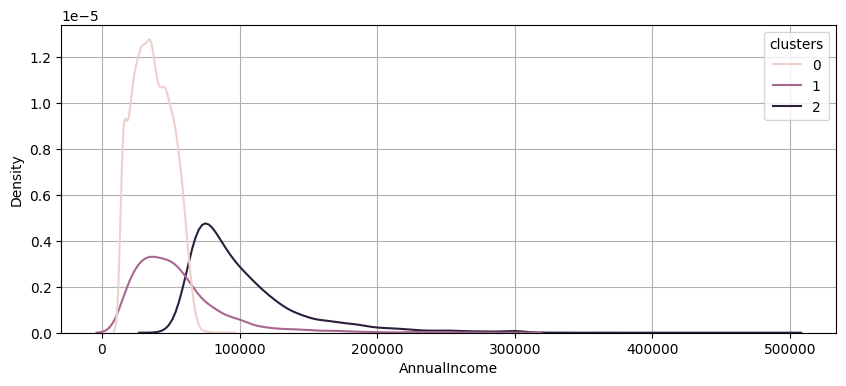

In [48]:
sns.kdeplot(data=df,x='AnnualIncome',hue='clusters')
plt.grid()
plt.show()

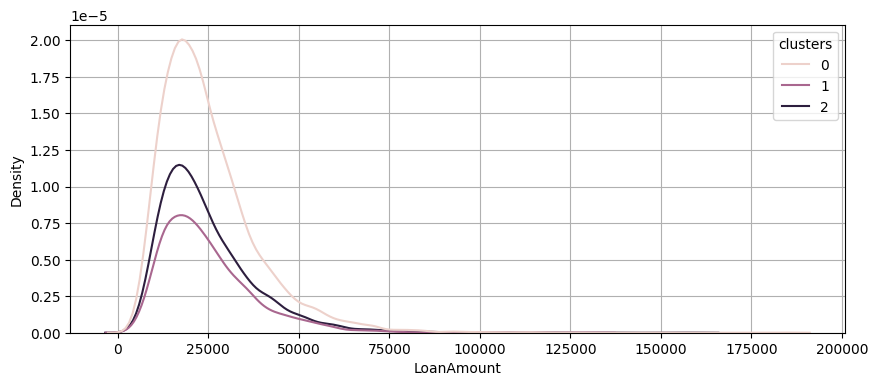

In [49]:
sns.kdeplot(data=df,x='LoanAmount',hue='clusters')
plt.grid()
plt.show()

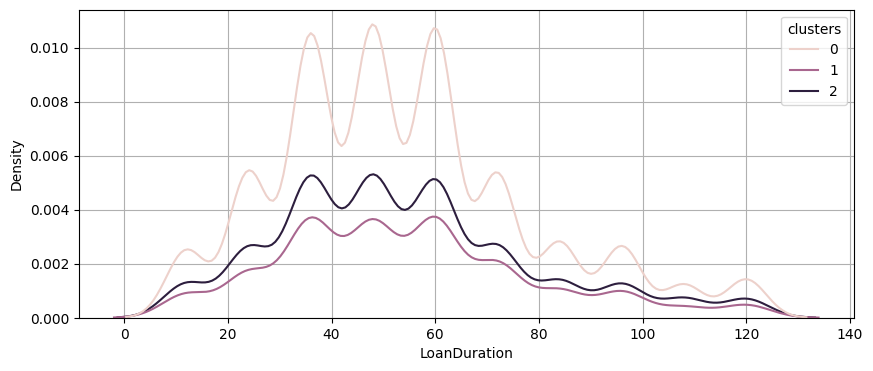

In [50]:
sns.kdeplot(data=df,x='LoanDuration',hue='clusters')
plt.grid()
plt.show()

In [51]:
df.select_dtypes(exclude='object').columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore', 'Experience',
       'LoanAmount', 'LoanDuration', 'NumberOfDependents',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults',
       'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore', 'clusters'],
      dtype='object')

In [52]:
cols=['Age', 'AnnualIncome', 'CreditScore', 'Experience',
       'LoanAmount', 'LoanDuration', 'NumberOfDependents',
       'MonthlyDebtPayments', 'CreditCardUtilizationRate',
       'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
       'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults',
       'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']

In [53]:
len(cols)

30

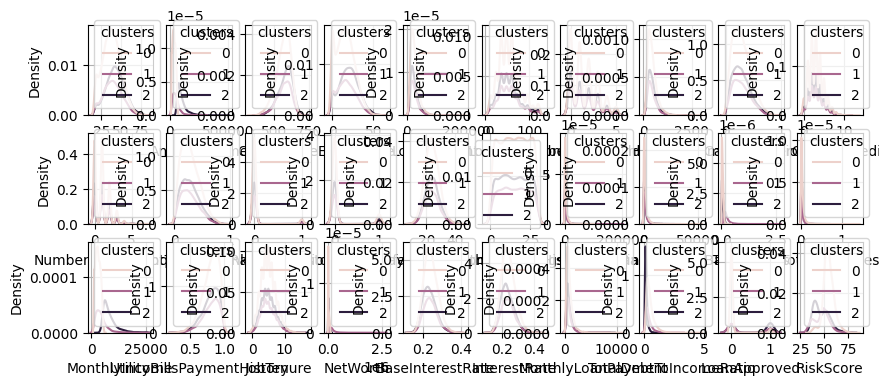

In [54]:
r=3
c=10
it=1
for i in cols:
    plt.subplot(r,c,it)
    sns.kdeplot(data=df,x=i,hue='clusters')
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()
    